In [217]:
import pandas as pd
import tensorflow as tf
file_path = './期末參數資料(綜合_去極端_流量).csv'
data = pd.read_csv(file_path)


In [194]:
display(data.head())

,形式,入水口角度,出水口角度,旋轉角度,葉厚,片數,間隙(葉輪與幫浦腳),Q(全開流量),揚程,W(瓦數)
0,1,34.0,13.0,64,2.5,6,0.3,25.0,9.6,164.0
1,1,34.0,13.0,64,2.5,6,0.3,50.0,8.1,199.0
2,1,34.0,13.0,64,2.5,6,0.3,75.0,5.2,235.0
3,1,34.0,13.0,64,2.5,6,0.3,100.0,1.0,273.0
4,1,34.0,13.0,63,2.5,6,0.3,25.0,9.3,165.0


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   形式          486 non-null    int64  
 1   入水口角度       486 non-null    float64
 2   出水口角度       486 non-null    float64
 3   旋轉角度        486 non-null    int64  
 4   葉厚          486 non-null    float64
 5   片數          486 non-null    int64  
 6   間隙(葉輪與幫浦腳)  486 non-null    float64
 7   Q(全開流量)     486 non-null    float64
 8   揚程          486 non-null    float64
 9   W(瓦數)       486 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 38.1 KB


In [196]:
import numpy as np
data = data[['形式','入水口角度','出水口角度','旋轉角度','葉厚','片數','間隙(葉輪與幫浦腳)','Q(全開流量)','揚程','W(瓦數)']].values  
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_scaled = (data - data_mean) / data_std
print(data_scaled[0])
print(data_scaled.shape)


[-0.78055847 -0.46081772 -0.81880222  0.64436194 -1.02422996  0.51255006
  0.57869787 -1.2240692   0.52390805 -0.9659967 ]
(486, 10)


In [197]:
data_mean

array([  1.37860082,  34.86255144,  14.37654321,  53.90534979,
         2.79835391,   5.32510288,   0.28676955,  78.79794239,
         7.60329218, 254.30740741])

In [198]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

# scaler_x = StandardScaler()
# data_scaled = scaler_x.fit_transform(data)
# print(data_scaled[0])
# print(data_scaled.shape)

In [199]:
def weighted_mse(y_true, y_pred):
    import tensorflow as tf
    weights = tf.where(tf.abs(y_true) < 0.1, 2.0, 1.0)  # 為接近零的實際值增加權重
    return tf.reduce_mean(tf.square(y_true - y_pred) * weights)

In [200]:
# Auto-encoder model
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

input_dim = data_scaled.shape[1]  

# # 使用 Sequential 建立編碼器
encoder = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # 使用整數除法確保單元數為整數
    Dense(8, activation='linear')
])

# 使用 Sequential 建立解碼器
decoder = Sequential([
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='linear')
])

# 定義輸入層的維度
input_layer = Input(shape=(input_dim,))
encoded_output = encoder(input_layer)
decoded_output = decoder(encoded_output)
autoencoder = Model(inputs=input_layer, outputs=decoded_output)
autoencoder.compile(optimizer='adam', loss=weighted_mse)


In [201]:
history = autoencoder.fit(data_scaled, data_scaled,
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_split=0.2)


Epoch 1/100
39/39 [==============================] - 1s 8ms/step - loss: 0.8866 - val_loss: 1.0566
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6784 - val_loss: 0.8353
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4459 - val_loss: 0.4882
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3147 - val_loss: 0.3484
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2562 - val_loss: 0.2796
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2125 - val_loss: 0.2165
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1719 - val_loss: 0.1684
Epoch 8/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1399 - val_loss: 0.1321
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1209 - val_loss: 0.1144
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1047 - val_loss: 0.0948
Epoch 11/

## Model evaluation

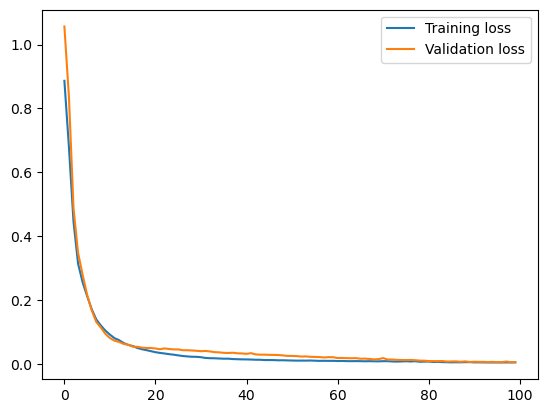

In [202]:
import matplotlib.pyplot as plt
# print the training histroy
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [203]:
# 使用模型進行預測
decoded_data = autoencoder.predict(data_scaled)
# 計算和顯示重構誤差
reconstruction_error = np.mean(np.power(data_scaled - decoded_data, 2), axis=1)
print("平均重構誤差:", np.mean(reconstruction_error))

16/16 [==============================] - 0s 2ms/step
平均重構誤差: 0.005446590384966589


0


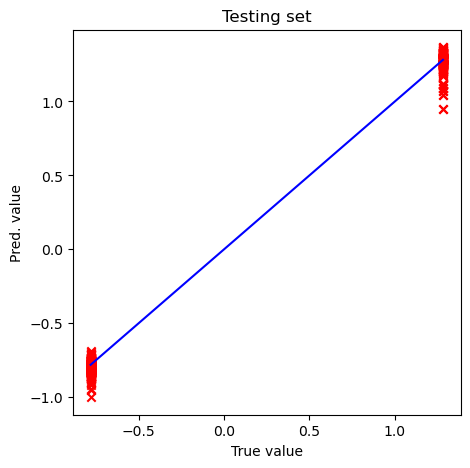

1


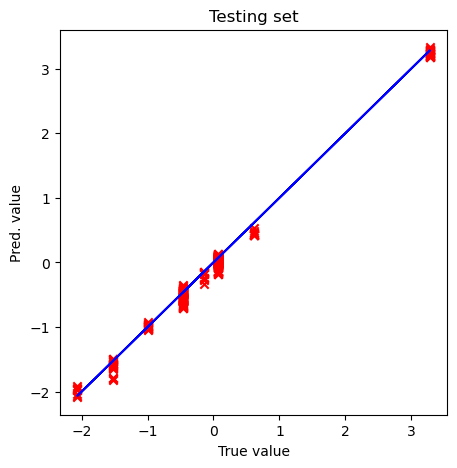

2


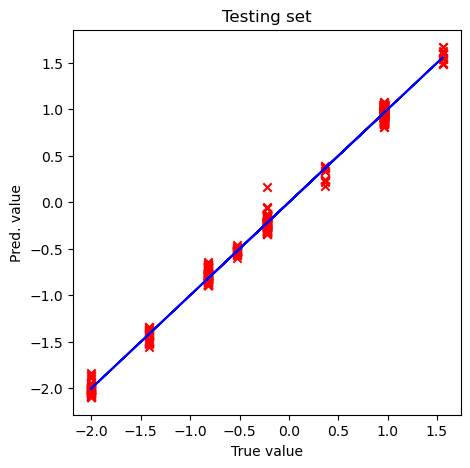

3


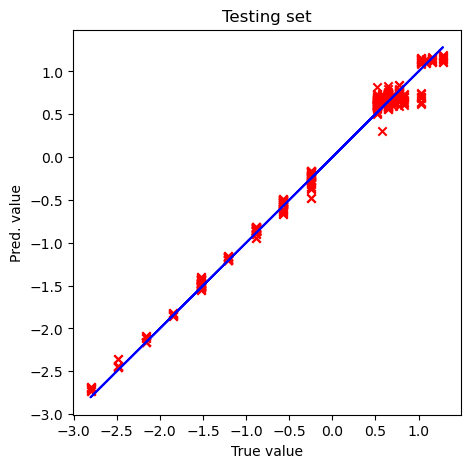

4


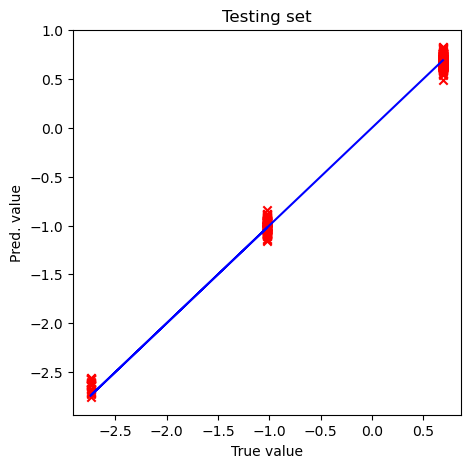

5


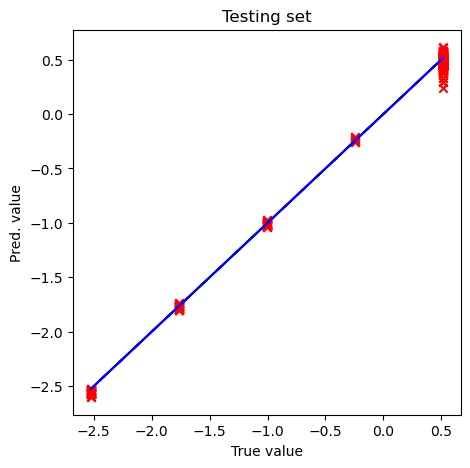

6


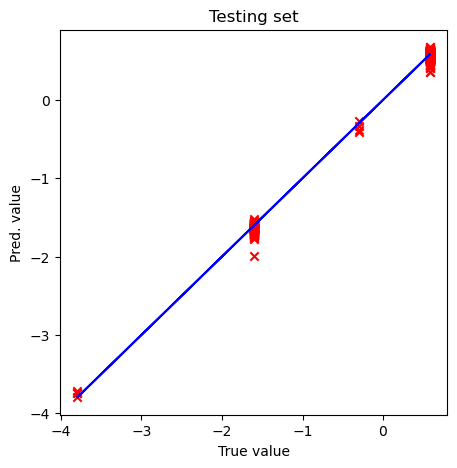

7


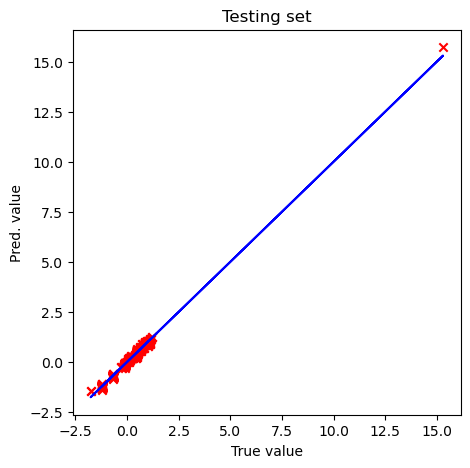

8


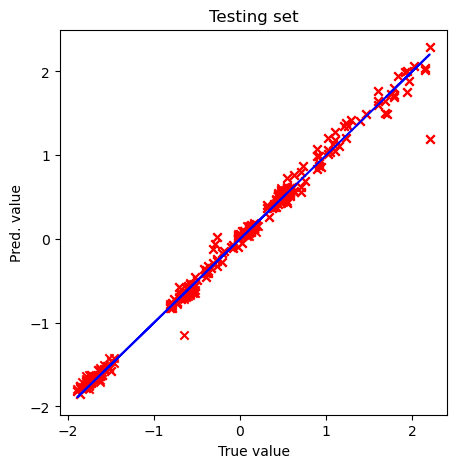

9


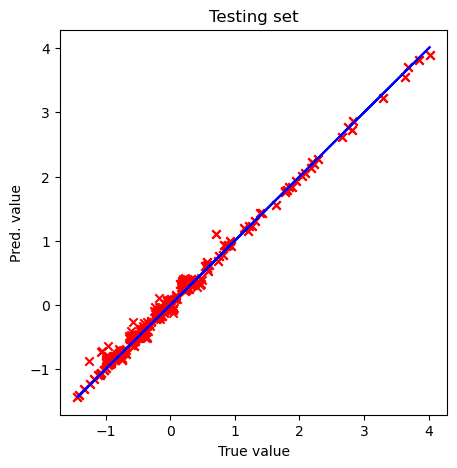

In [204]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# y_pred = model.predict(x_test)
for i in range(0,decoded_data.shape[1]):
    print(i)
    plot_scatter(data_scaled[:,i], decoded_data[:,i], "Testing set", "True value", "Pred. value",1)

# y_pred = model.predict(x_train)
# plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


16/16 [==============================] - 0s 1ms/step


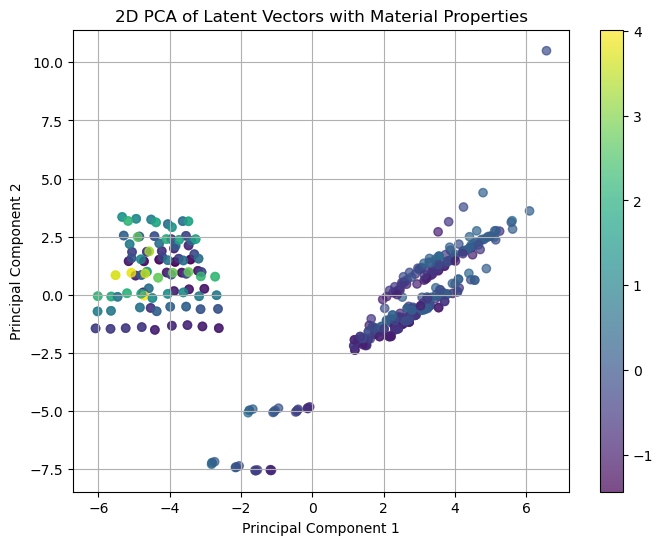

In [205]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 假設 encoder_model 是從autoencoder中提取的編碼部分
latent_vector = encoder.predict(data_scaled)
N_d = 9

# 使用PCA將隱藏層的向量壓縮到2維
pca = PCA(n_components=2)
latent_vector_2d = pca.fit_transform(latent_vector)
material_properties = data_scaled[:,N_d]

# 視覺化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_vector_2d[:, 0], latent_vector_2d[:, 1], alpha=0.7, c=material_properties, cmap='viridis')
plt.colorbar(scatter)  # 添加色條
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Latent Vectors with Material Properties')
plt.grid(True)
plt.show()


16/16 [==============================] - 0s 1ms/step
[[-0.8256584  -0.58177537 -0.7926401  ... -1.2487288   0.5607973
  -0.854162  ]
 [-0.81984365 -0.55696017 -0.767607   ... -0.7448811   0.09490194
  -0.51021254]
 [-0.8167834  -0.54123414 -0.8375846  ... -0.16390783 -0.67581165
  -0.14305748]
 ...
 [ 1.1158947   0.05606845  0.9404706  ...  0.5444991   0.38562164
   0.05822312]
 [ 1.0941699   0.02265697  0.86645913 ...  0.6903307   0.8575244
   0.9350404 ]
 [ 1.0405338  -0.04549327  0.81274223 ...  0.7877369   1.493563
   2.1976514 ]]


(-3.0, 3.0)

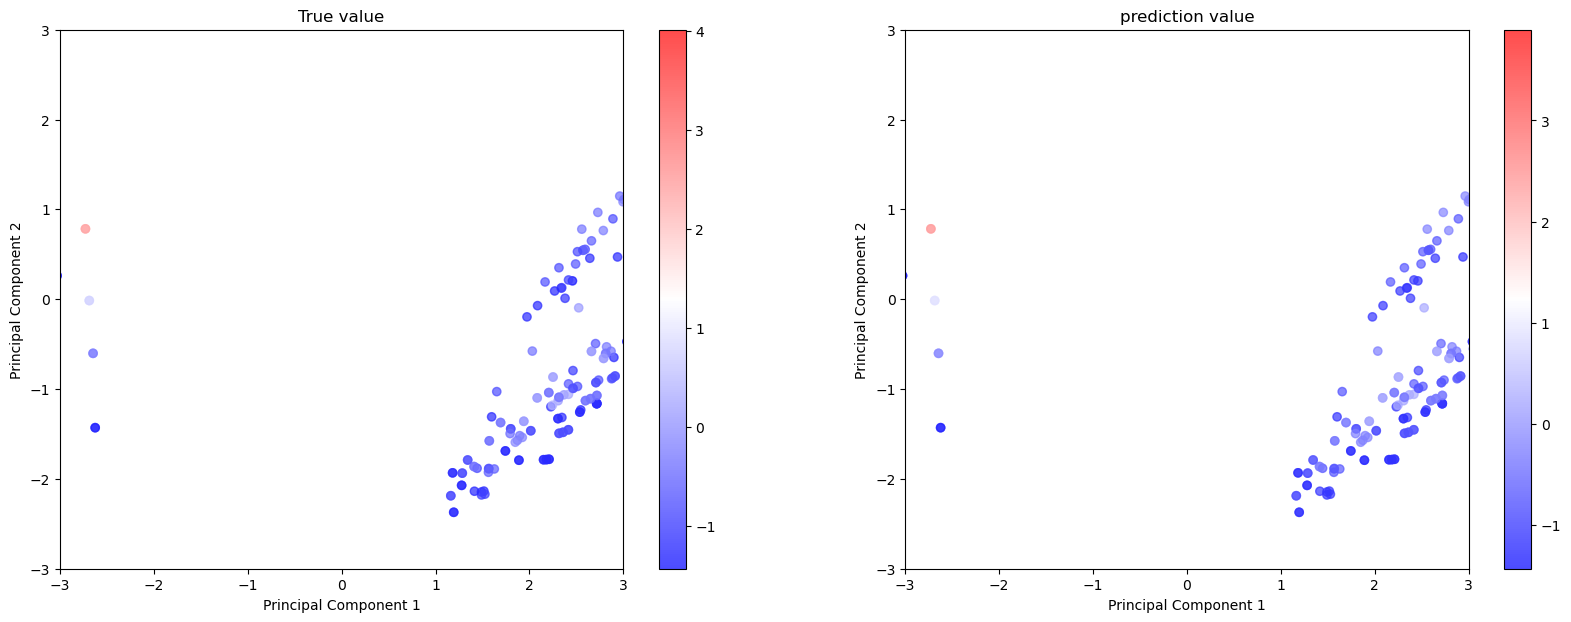

In [206]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 假設 encoder_model 是從autoencoder中提取的編碼部分
latent_vector = encoder.predict(data_scaled)
# 選取contour要呈獻的 vector
N_d = 9
# 設置latent vector Z0, Z1 之範圍
xlim = 3
ylim = xlim

# 使用PCA將隱藏層(latent vectors)的向量壓縮到2維
pca = PCA(n_components=2)
latent_vector_2d = pca.fit_transform(latent_vector)
reconstructed_latent_vector_material_properties = decoder.predict(latent_vector)

######## for testing the inverse_transform of pca ###############
# reconstructed_latent_vector = pca.inverse_transform(latent_vector_2d)    #!!!
# reconstructed_latent_vector_material_properties = decoder.predict(reconstructed_latent_vector)    #!!!
######## for testing the inverse_transform of pca ###############


# 視覺化
plt.figure(figsize=(20, 7))

# 繪制第一個子圖
# plot the latent space in 2-d map
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
material_properties = data_scaled[:, N_d]
scatter1 = plt.scatter(latent_vector_2d[:, 0], latent_vector_2d[:, 1], alpha=0.7, c=material_properties, cmap='bwr')
plt.colorbar(scatter1)  # 添加色條
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('True value')
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
# plt.grid(True)
# plt.show()

# plot the latent space in 2-d map & validates inverse_transform of pca 
print(reconstructed_latent_vector_material_properties)
material_properties = reconstructed_latent_vector_material_properties[:, N_d]
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
scatter2 = plt.scatter(latent_vector_2d[:, 0], latent_vector_2d[:, 1], alpha=0.7, c=material_properties, cmap='bwr')
plt.colorbar(scatter2)  # 添加色條
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('prediction value')
# plt.title('pca inverse transform value')     #!!!

plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)

# plt.grid(True)
# plt.show()

# plt.subplot(1, 3, 3)  # (rows, columns, panel number)


117/117 [==============================] - 0s 1ms/step


(-3.0, 3.0)

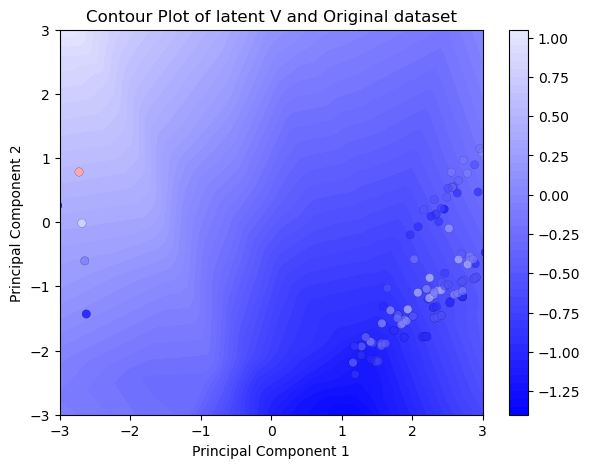

In [207]:
# 設定latent space視覺化空間
x = np.arange(-xlim, xlim+0.1, 0.1)
y = np.arange(-xlim, xlim+0.1, 0.1)
X, Y = np.meshgrid(x, y)
coordinates = np.stack([X.ravel(), Y.ravel()], axis=1)

# # latent_vector = encoder.predict(data_scaled)
# N_d =3
# # 假設 encoder_model 是從autoencoder中提取的編碼部分
# latent_vector = encoder.predict(data_scaled)
# pca = PCA(n_components=2)
# latent_vector_2d = pca.fit_transform(latent_vector)

# reconstruct 2-dimention pca vector to n-dimention latent vectors
reconstructed_latent_vector = pca.inverse_transform(coordinates)
reconstructed_latent_vector_material_properties = decoder.predict(reconstructed_latent_vector)

z_min = np.min(reconstructed_latent_vector_material_properties[:,N_d])
z_max = np.max(reconstructed_latent_vector_material_properties[:,N_d])
mp_min = np.min(data_scaled[:, N_d])
mp_max = np.max(data_scaled[:, N_d])

# 確定統一的顏色映射範圍
vmin = min(z_min, mp_min)
vmax = max(z_max, mp_max)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
Z = reconstructed_latent_vector_material_properties[:, N_d].reshape(X.shape)  # 重新整形以匹配 X, Y
contour = plt.contourf(X, Y, Z, cmap='bwr', levels=50, vmin=vmin, vmax=vmax)
plt.colorbar(contour)

material_properties = data_scaled[:, N_d]
scatter1 = plt.scatter(latent_vector_2d[:, 0], latent_vector_2d[:, 1], alpha=0.7, c=material_properties, cmap='bwr', edgecolors='black',linewidths=0.1, vmin=vmin, vmax=vmax)
# plt.colorbar(scatter1)  # 添加色條
plt.title('Contour Plot of latent V and Original dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
# plt.show()

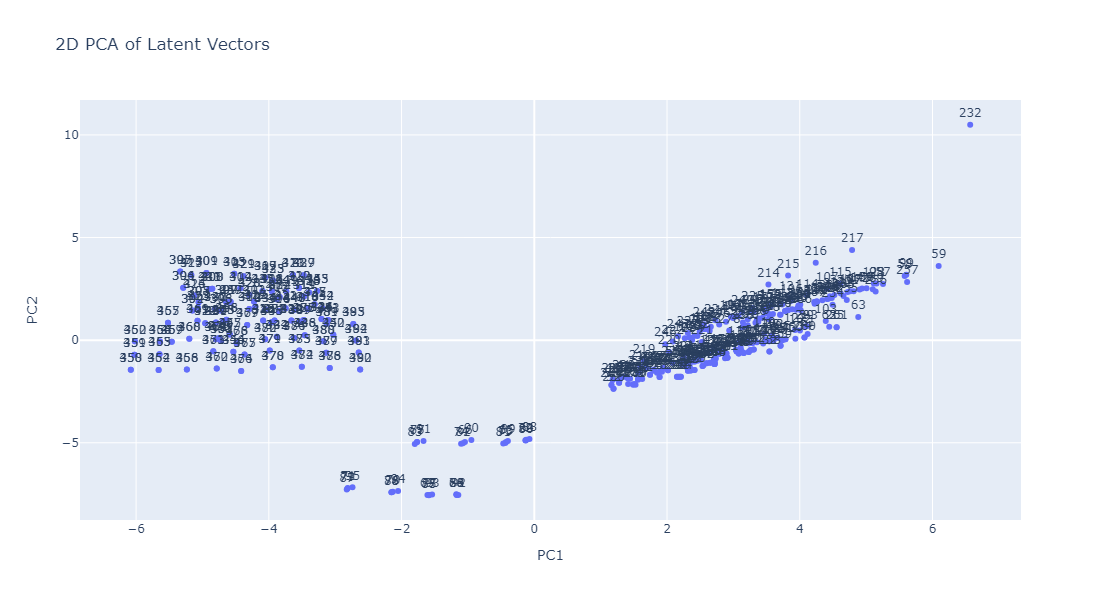

In [208]:
import plotly.express as px

# 前面步驟得到的PCA結果 latent_vector_2d
df_latent = pd.DataFrame(latent_vector_2d, columns=['PC1', 'PC2'])

# 為了在圖表上顯示每個點的索引，我們可以將索引作為一個列添加到DataFrame中
df_latent['Index'] = range(0, len(df_latent))

# 使用Plotly Express創建散點圖
fig = px.scatter(df_latent, x='PC1', y='PC2', text='Index', title='2D PCA of Latent Vectors')
fig.update_traces(textposition='top center')
fig.update_layout(height=600, width=800)
fig.show()

In [178]:
print(df_latent.loc[20,["PC1","PC2"]])

PC1   -2.559748
PC2   -0.460687
Name: 20, dtype: float64


In [236]:
# 設計建議取樣
# reconstructed_latent_vector = pca.inverse_transform(latent_vector_2d)    #!!!
# reconstructed_latent_vector_material_properties = decoder.predict(reconstructed_latent_vector)    
input_index = int(input("index: "))
pc1 = df_latent.at[input_index,"PC1"]
pc2 = df_latent.at[input_index,"PC2"]
origin_parameters = decoder.predict(pca.inverse_transform([[pc1,pc2]]))

print("type('1' for centrifugal, '2' for hybrid)： ",origin_parameters[0][0] * data_std[0] + data_mean[0])
print("inlet_angle（degree）： ",origin_parameters[0][1] * data_std[1] + data_mean[1])
print("outlet_angle（degree）： ",origin_parameters[0][2] * data_std[2] + data_mean[2])
print("rotating_angle（degree）： ",origin_parameters[0][3] * data_std[3] + data_mean[3])
print("thickness(mm)： ",origin_parameters[0][4] * data_std[4] + data_mean[4])
print("slices： ",origin_parameters[0][5] * data_std[5] + data_mean[5])
print("gap (mm)： ",origin_parameters[0][6] * data_std[6] + data_mean[6])
print("flow (L/min)： ",origin_parameters[0][7] * data_std[7] + data_mean[7])
print("range (m)： ",origin_parameters[0][8] * data_std[8] + data_mean[8])
print("power (w)： ",origin_parameters[0][9] * data_std[9] + data_mean[9])

index:  397


1/1 [==============================] - 0s 26ms/step
type('1' for centrifugal, '2' for hybrid)：  2.4509559272099377
inlet_angle（degree）：  34.27452688617399
outlet_angle（degree）：  16.612218115264664
rotating_angle（degree）：  36.6887663552607
thickness(mm)：  3.0427289825330286
slices：  2.838910646329696
gap (mm)：  0.3147833702807624
flow (L/min)：  129.6554155881902
range (m)：  13.091937067620474
power (w)：  359.0421742079599


In [212]:
autoencoder.save('Autoencoder_DCBL.h5')

In [237]:
# 一般模型預測
model = tf.keras.models.load_model('ANN_DCBL.h5')
predict_value = model.predict(np.expand_dims(origin_parameters[0][0:8], axis=0))
print("range (m)： ",predict_value[0][0] * data_std[8] + data_mean[8])
print("power (w)： ",predict_value[0][1] * data_std[9] + data_mean[9])


1/1 [==============================] - 0s 60ms/step
range (m)：  19.230026630446762
power (w)：  612.4802926872131
